In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data  = pd.read_csv(r"D:\programming\2024-2025\Data-analytics-methods-and-technologies\lab1\BankChurners.csv")
data .head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


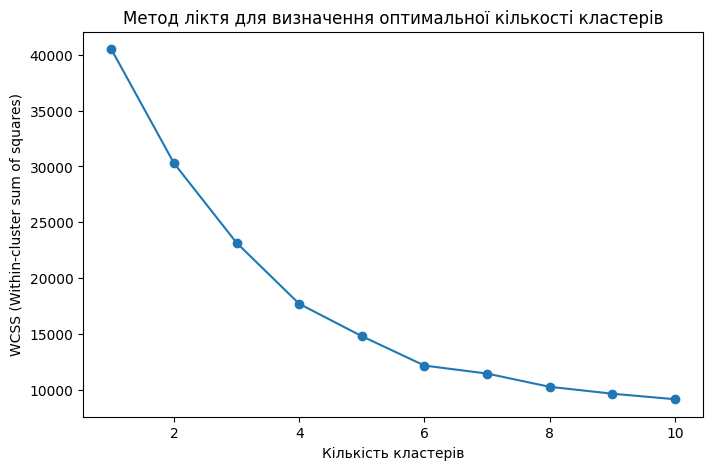

In [3]:
features = data[['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']]

# Масштабування даних для зменшення впливу різних одиниць вимірювання
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Метод ліктя для визначення оптимальної кількості кластерів
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

optimal_clusters = 4  

Центри кластерів та розмір кожного кластера:
    Customer_Age  Credit_Limit  Total_Trans_Amt  Avg_Utilization_Ratio  \
0     46.393378   2723.620292      3620.189854               0.624417   
1     46.678913  26873.733284      3825.484938               0.045860   
2     46.431813   6585.309805      3420.431813               0.112455   
3     44.835616  13841.225405     14320.292653               0.175061   

   Cluster Size  
0          3292  
1          1359  
2          4673  
3           803  


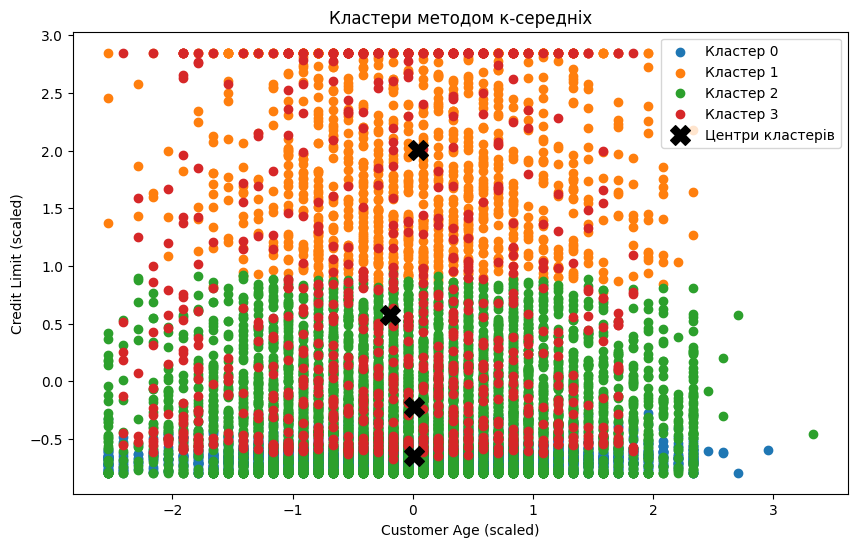

In [4]:
# Кластеризація методом к-середніх
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(scaled_features)

# Відображення центрів кластерів та кількості елементів у кожному кластері
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)
cluster_counts = data['Cluster_KMeans'].value_counts().sort_index()
cluster_info = pd.concat([cluster_centers, cluster_counts.rename('Cluster Size')], axis=1)
print("Центри кластерів та розмір кожного кластера:\n", cluster_info)

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(scaled_features[data['Cluster_KMeans'] == i, 0], scaled_features[data['Cluster_KMeans'] == i, 1], label=f'Кластер {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Центри кластерів')
plt.xlabel('Customer Age (scaled)')
plt.ylabel('Credit Limit (scaled)')
plt.title('Кластери методом к-середніх')
plt.legend()
plt.show()

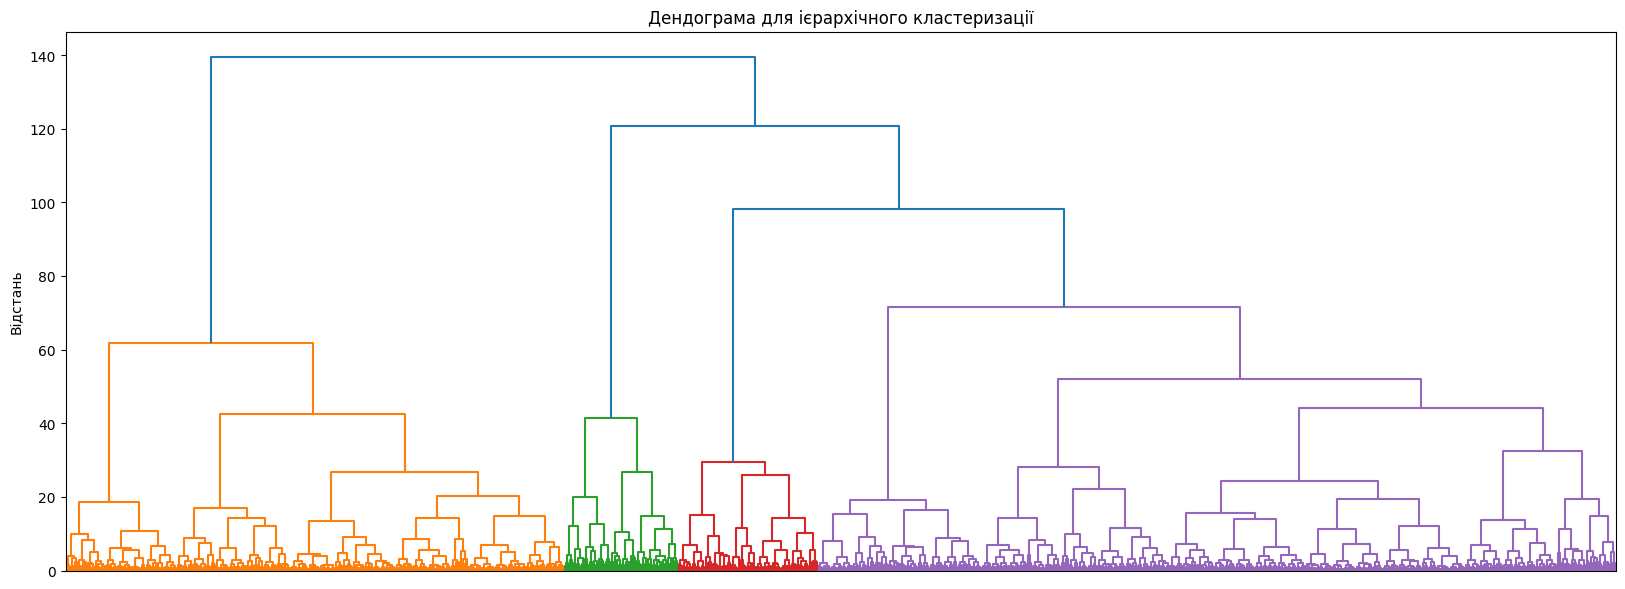

In [5]:
# Ієрархічний аналіз
linkage_matrix = linkage(scaled_features, method='ward')
plt.figure(figsize=(20, 7))
dendrogram(linkage_matrix, no_labels=True)
plt.title('Дендограма для ієрархічного кластеризації')
# plt.xlabel('Індекс зразка')
plt.ylabel('Відстань')
plt.show()

In [6]:
hierarchical_clusters = 4  #
data['Cluster_Hierarchical'] = fcluster(linkage_matrix, hierarchical_clusters, criterion='maxclust')

kmeans_counts = data['Cluster_KMeans'].value_counts().sort_index()
hierarchical_counts = data['Cluster_Hierarchical'].value_counts().sort_index()
comparison_df = pd.DataFrame({'KMeans': kmeans_counts, 'Hierarchical': hierarchical_counts})
print("Порівняння кількості елементів у кожному кластері для обох методів:\n", comparison_df)

Порівняння кількості елементів у кожному кластері для обох методів:
    KMeans  Hierarchical
0  3292.0           NaN
1  1359.0        3260.0
2  4673.0         747.0
3   803.0         914.0
4     NaN        5206.0
